In [1]:
import math

# Part 1
## Task 1

In [2]:
def div3(n):
    """tests whether a number is divisble by 3"""
    test=n/3
    testint=float(int(test))
    print(f"test: {test}")
    print(f"testint: {testint}")
    if test==testint:
        print(f"{n} is divisible by 3")
    else:
        print(f"{n} is not divisible by 3")

In [3]:
div3(6)

test: 2.0
testint: 2.0
6 is divisible by 3


## Task 2

In [4]:
def fruit_test(f):
    """tests whether a certain fruit is acceptable"""
    fruits=["apple", "orange", "pear", "kiwi","strawberry"]
    if f in fruits:
        print(f"{f} is an acceptable fruit")
    else:
        print(f"{f} is not an acceptable fruit")


In [5]:
fruit_test("apple")
fruit_test("banana")

apple is an acceptable fruit
banana is not an acceptable fruit


## Task 3

In [6]:
from math import sin, cos, atan2 
def haversine_function(latlon1: list, latlon2: list):
    """"""
    r = 6371
    lat1, lon1 = latlon1
    lat2, lon2 = latlon2
    radlat1 = math.radians(lat1)
    radlon1 = math.radians(lon1)
    radlat2 = math.radians(lat2)
    radlon2 = math.radians(lon2)
    lat_dist = radlat2 - radlat1
    lon_dist = radlon2 - radlon1
    a=sin(lat_dist/2)**2+cos(radlat1)*cos(radlat2)*sin(lon_dist/2)**2
    c=2*atan2(math.sqrt(a),math.sqrt(1-a))
    d=r*c
    print(f"{d} km is the distance between the coordinates provided") 

In [7]:
coord1=[51.5072, 0.1276]
coord2=[55.9533, 3.1883]
haversine_function(coord1,coord2)

533.677916923906 km is the distance between the coordinates provided


# Part 2
## Question 1

In [8]:
import numpy as np
import pandas as pd
trees=pd.read_csv("data/portland_park_trees.csv")
q1=trees[trees.Genus.str.contains("Acer|Quercus")]
print(f"{len(q1.index)} trees are either Quercus or Acer")

5675 trees are either Quercus or Acer


## Question 2

In [9]:
q2=q1[q1.DBH.values>50]
print(f"{len(q2.index)} Quercus or Acer trees have a DBH of greater than 50 inches")

124 Quercus or Acer trees have a DBH of greater than 50 inches


## Question 3

In [10]:
Quercus_mean_DBH=trees[trees.Genus.str.contains("Quercus")].DBH.mean()
Acer_mean_DBH=trees[trees.Genus.str.contains("Acer")].DBH.mean()
Fraxinus_mean_DBH=trees[trees.Genus.str.contains("Fraxinus")].DBH.mean()
print(f"Quercus mean DBH: {Quercus_mean_DBH} inches")
print(f"Acer mean DBH: {Acer_mean_DBH} inches")
print(f"Fraxinus mean DBH: {Fraxinus_mean_DBH} inches")
print("Quercus trees have the highest mean DBH")

Quercus mean DBH: 23.56823839157492 inches
Acer mean DBH: 18.419085331846066 inches
Fraxinus mean DBH: 11.033609693877551 inches
Quercus trees have the highest mean DBH


## Question 4

In [11]:
q4=trees[trees.Genus.str.contains("Acer")].Genus_spec.unique()
print(f"{len(q4)} types of species in the Acer genus")

20 types of species in the Acer genus


In [12]:
cities=pd.read_csv("data/world_cities.csv")

In [13]:
cities["pop_M"]=cities["pop"]/1000000
cities=cities.drop("pop",axis=1)

In [14]:
# Creating a subset of cities that start with the same letter as my first name
Austin=cities[cities.city.str.startswith("Austin")]


In [15]:
# Using the first value in the cities subclass to find all cities in that country
USA_Cities=cities[cities.country.str.startswith(cities[cities.index==Austin.index[0]].country.values[0])]

In [16]:
# Returning the top 5 populated cities in USA
USA_Cities.sort_values("pop_M",ascending=False)[0:5]

,city,country,lat,lon,capital,pop_M
25877,New York,USA,40.67,-73.94,0,8.124427
21435,Los Angeles,USA,34.11,-118.41,0,3.911500
7366,Chicago,USA,41.84,-87.68,0,2.830144
14769,Houston,USA,29.77,-95.39,0,2.043005
28856,Phoenix,USA,33.54,-112.07,0,1.450884


# Part 3
## Graph 1

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

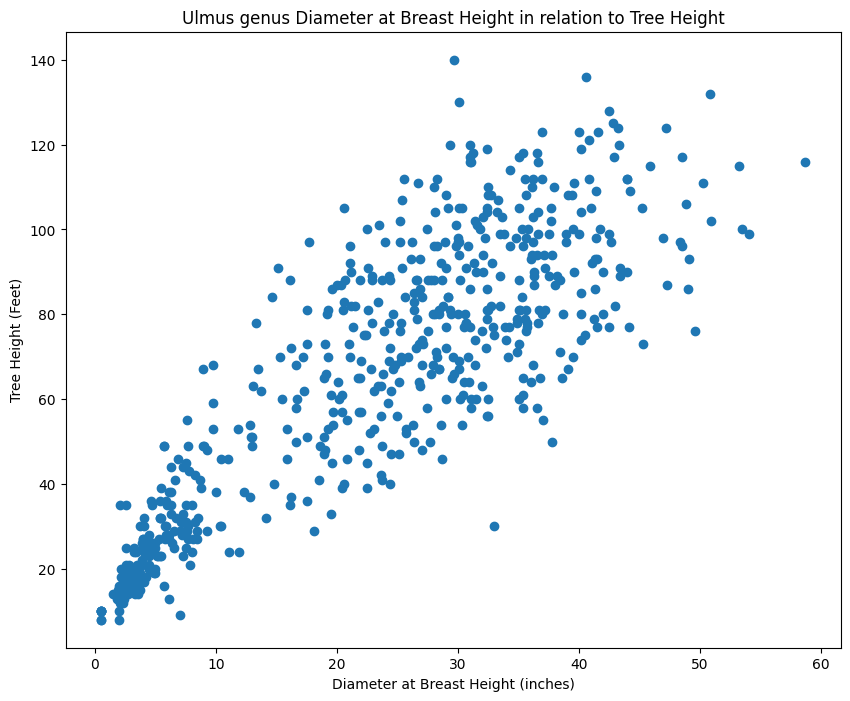

In [24]:
trees_ulmus=trees[trees.Genus.str.contains("Ulmus")]
fig, ax = plt.subplots(figsize=[10,8])
ax.set_xlabel("Diameter at Breast Height (inches)")
ax.set_ylabel("Tree Height (Feet)")
ax.set_title("Ulmus genus Diameter at Breast Height in relation to Tree Height")
ax.scatter(x=trees_ulmus.DBH,y=trees_ulmus.TreeHeight)

## Graph 2

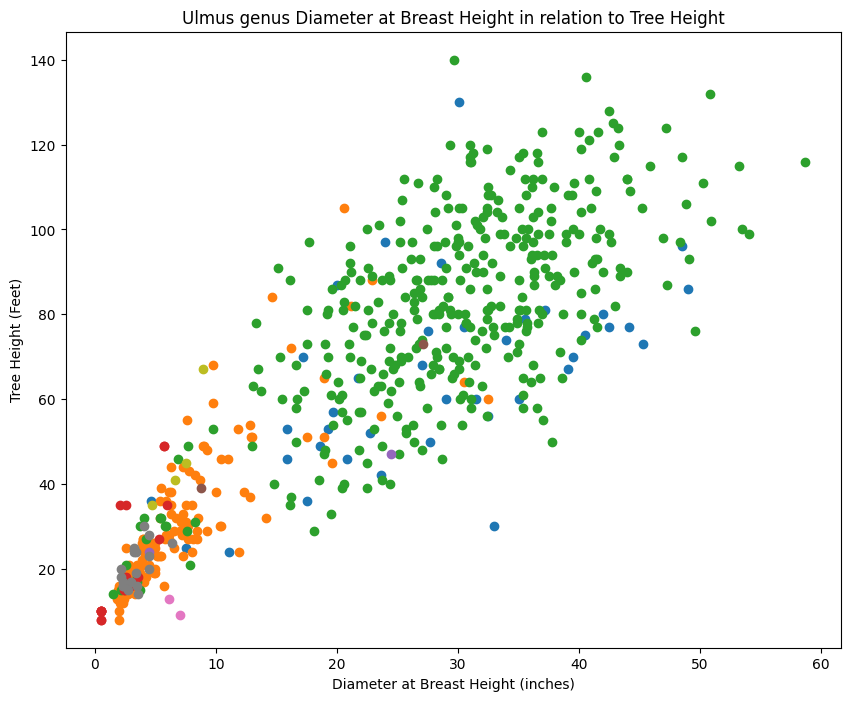

In [26]:
fig, ax = plt.subplots(figsize=[10,8])
ax.set_xlabel("Diameter at Breast Height (inches)")
ax.set_ylabel("Tree Height (Feet)")
ax.set_title("Ulmus genus Diameter at Breast Height in relation to Tree Height")
for s in trees_ulmus.Genus_spec.unique():
    Ulmus_specie=trees_ulmus[trees_ulmus.Genus_spec.str.contains(s)]
    ax.scatter(x=Ulmus_specie.DBH,y=Ulmus_specie.TreeHeight)

## Graph 3

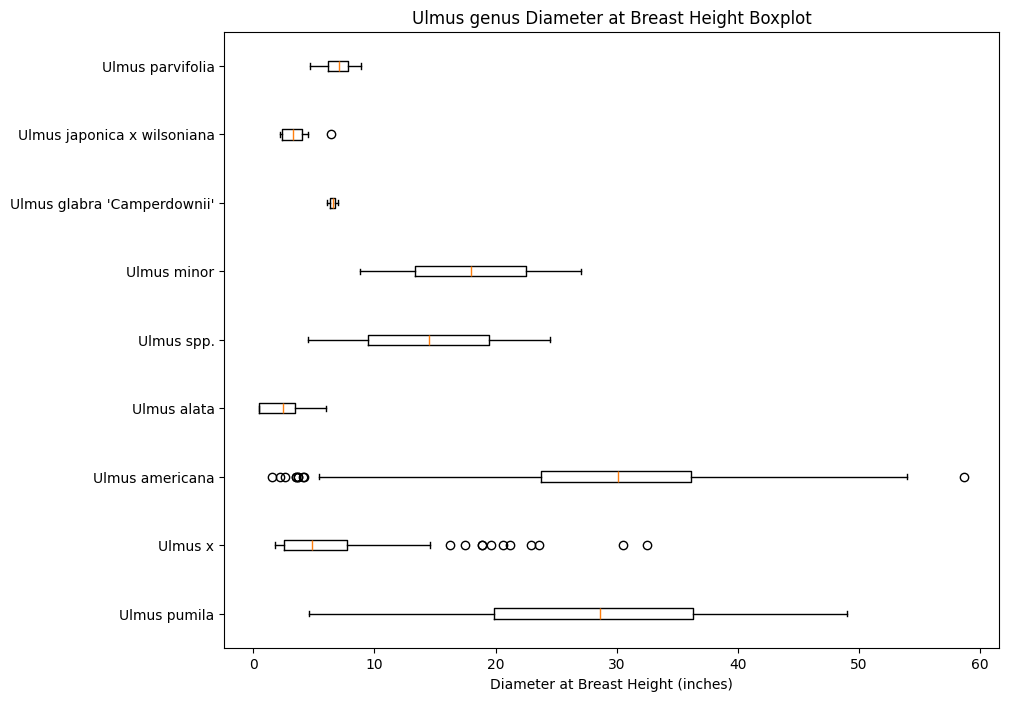

In [30]:
fig, ax = plt.subplots(figsize=[10,8])
ax.set_xlabel("Diameter at Breast Height (inches)")
ax.set_title("Ulmus genus Diameter at Breast Height Boxplot")
n=0
for s in trees_ulmus.Genus_spec.unique():
    Ulmus_specie=trees_ulmus[trees_ulmus.Genus_spec.str.contains(s)]
    ax.boxplot(x=Ulmus_specie.DBH,vert=False,labels={s},positions=[n])
    n+=1

## Graph 4

Text(0.5, 1.0, 'Ulmus genus Diameter at Breast Height Boxplot')

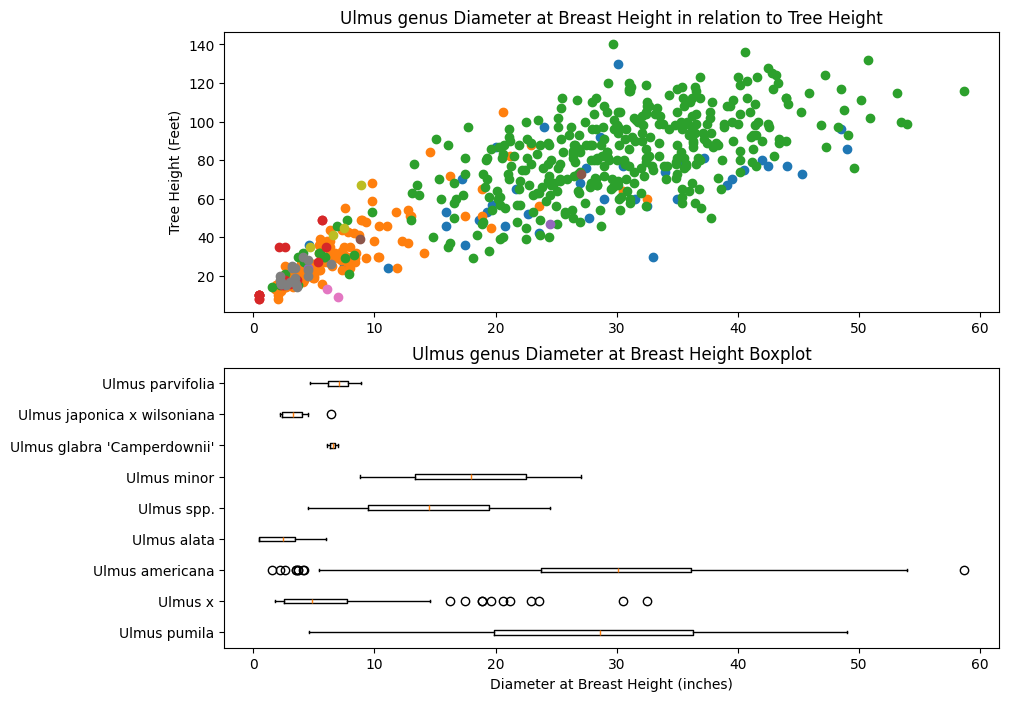

In [34]:
fig, axs = plt.subplots(2, figsize=[10,8])
n=0
for s in trees_ulmus.Genus_spec.unique():
    Ulmus_specie=trees_ulmus[trees_ulmus.Genus_spec.str.contains(s)]
    axs[0].scatter(x=Ulmus_specie.DBH,y=Ulmus_specie.TreeHeight)
    axs[1].boxplot(x=Ulmus_specie.DBH,vert=False,labels={s},positions=[n])
    n+=1
axs[1].set_xlabel("Diameter at Breast Height (inches)")
axs[0].set_ylabel("Tree Height (Feet)")
axs[0].set_title("Ulmus genus Diameter at Breast Height in relation to Tree Height")
axs[1].set_title("Ulmus genus Diameter at Breast Height Boxplot")